In [67]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [68]:
print('Training set image shape:', x_train.shape)
print('Training set label shape:', y_train.shape) 
print('Test set image shape:', x_test.shape) 
print('Test set label shape:', y_test.shape) 

Training set image shape: (50000, 32, 32, 3)
Training set label shape: (50000, 1)
Test set image shape: (10000, 32, 32, 3)
Test set label shape: (10000, 1)


In [69]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

#### Data Enhancement Settings

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=5,          
    width_shift_range=0.05,    
    height_shift_range=0.05,   
    horizontal_flip=False,     
)

datagen.fit(x_train)

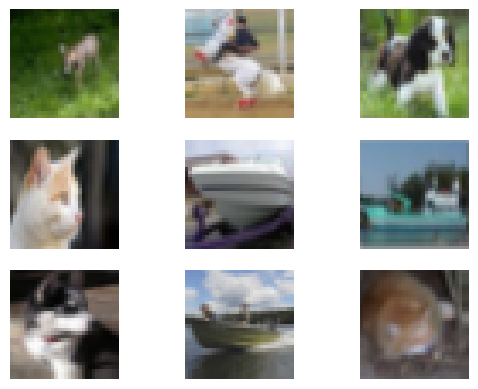

In [72]:

# View Data Enhancement Effects
import matplotlib.pyplot as plt

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()
    break

### Start building the ResNet-18 network and tuning hyperparameters

In [73]:
def resnet_block(inputs, filters, stride=1, use_residual=True):
    x = Conv2D(filters, kernel_size=3, strides=stride, padding='same', kernel_regularizer=l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=3, strides=1, padding='same', kernel_regularizer=l2(1e-4))(x)
    x = BatchNormalization()(x)
    
    if use_residual:
        if stride != 1:
            inputs = Conv2D(filters, kernel_size=1, strides=stride, padding='same', kernel_regularizer=l2(1e-4))(inputs)
        x = Add()([x, inputs])
    
    x = Activation('relu')(x)
    return x

In [74]:
# ResNet-18 Construction
def build_resnet18(input_shape=(32, 32, 3), num_classes=10, use_residual=True):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)  
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Conv2_x
    x = resnet_block(x, 32, use_residual=use_residual)
    x = resnet_block(x, 32, use_residual=use_residual)
    
    # Conv3_x
    x = resnet_block(x, 64, stride=2, use_residual=use_residual)
    x = resnet_block(x, 64, use_residual=use_residual)
    
    # Conv4_x
    x = resnet_block(x, 128, stride=2, use_residual=use_residual)
    x = resnet_block(x, 128, use_residual=use_residual)
    
    # Conv5_x
    x = resnet_block(x, 256, stride=2, use_residual=use_residual)
    x = resnet_block(x, 256, use_residual=use_residual)
    
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    return model

Training with optimizer=SGD, learning_rate=0.05000000074505806, use_residual=True
Epoch 1/20
625/625 [==============================] - 72s 114ms/step - loss: 1.7675 - accuracy: 0.4396 - val_loss: 1.6279 - val_accuracy: 0.5139
Epoch 2/20
625/625 [==============================] - 74s 119ms/step - loss: 1.2616 - accuracy: 0.6329 - val_loss: 1.4122 - val_accuracy: 0.5918
Epoch 3/20
625/625 [==============================] - 75s 121ms/step - loss: 1.0047 - accuracy: 0.7304 - val_loss: 1.1131 - val_accuracy: 0.6940
Epoch 4/20
625/625 [==============================] - 74s 118ms/step - loss: 0.8539 - accuracy: 0.7862 - val_loss: 0.9962 - val_accuracy: 0.7446
Epoch 5/20
625/625 [==============================] - 74s 118ms/step - loss: 0.7455 - accuracy: 0.8295 - val_loss: 1.0090 - val_accuracy: 0.7539
Epoch 6/20
625/625 [==============================] - 74s 119ms/step - loss: 0.6624 - accuracy: 0.8639 - val_loss: 0.9865 - val_accuracy: 0.7672
Epoch 7/20
625/625 [============================

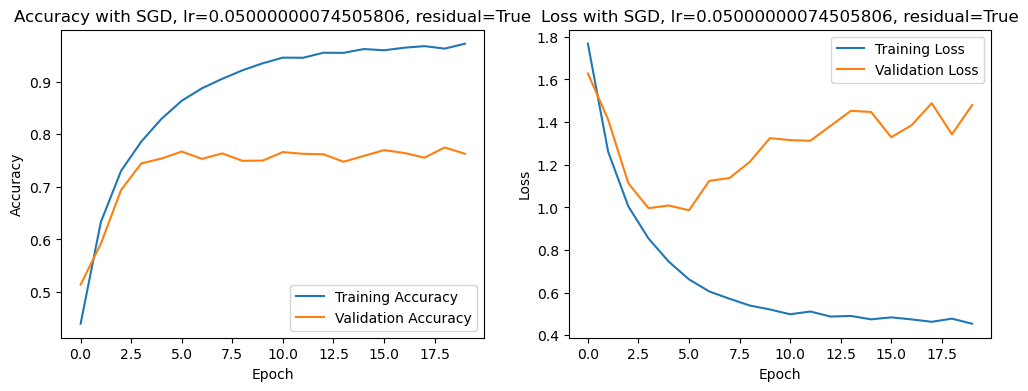

Training with optimizer=SGD, learning_rate=0.05000000074505806, use_residual=False
Epoch 1/20
625/625 [==============================] - 70s 111ms/step - loss: 1.8769 - accuracy: 0.3803 - val_loss: 1.6913 - val_accuracy: 0.4579
Epoch 2/20
625/625 [==============================] - 70s 111ms/step - loss: 1.4288 - accuracy: 0.5554 - val_loss: 1.4021 - val_accuracy: 0.5789
Epoch 3/20
625/625 [==============================] - 71s 113ms/step - loss: 1.1364 - accuracy: 0.6703 - val_loss: 1.3817 - val_accuracy: 0.6330
Epoch 4/20
625/625 [==============================] - 70s 113ms/step - loss: 0.9684 - accuracy: 0.7325 - val_loss: 1.1852 - val_accuracy: 0.6688
Epoch 5/20
625/625 [==============================] - 71s 114ms/step - loss: 0.8457 - accuracy: 0.7783 - val_loss: 1.1611 - val_accuracy: 0.6938
Epoch 6/20
625/625 [==============================] - 71s 114ms/step - loss: 0.7697 - accuracy: 0.8059 - val_loss: 0.9557 - val_accuracy: 0.7494
Epoch 7/20
625/625 [===========================

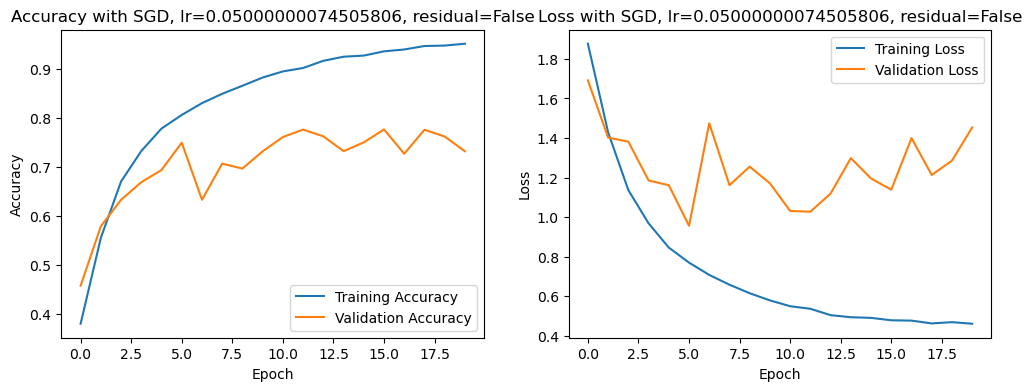

Training with optimizer=SGD, learning_rate=0.009999999776482582, use_residual=True
Epoch 1/20
625/625 [==============================] - 77s 121ms/step - loss: 1.6005 - accuracy: 0.4933 - val_loss: 1.4151 - val_accuracy: 0.5801
Epoch 2/20
625/625 [==============================] - 74s 119ms/step - loss: 1.1092 - accuracy: 0.6836 - val_loss: 1.3660 - val_accuracy: 0.6134
Epoch 3/20
625/625 [==============================] - 74s 119ms/step - loss: 0.8719 - accuracy: 0.7683 - val_loss: 1.1217 - val_accuracy: 0.7039
Epoch 4/20
625/625 [==============================] - 76s 121ms/step - loss: 0.7211 - accuracy: 0.8219 - val_loss: 1.1621 - val_accuracy: 0.6882
Epoch 5/20
625/625 [==============================] - 76s 121ms/step - loss: 0.5903 - accuracy: 0.8708 - val_loss: 1.2171 - val_accuracy: 0.7035
Epoch 6/20
625/625 [==============================] - 74s 119ms/step - loss: 0.4875 - accuracy: 0.9064 - val_loss: 1.2107 - val_accuracy: 0.7245
Epoch 7/20
625/625 [===========================

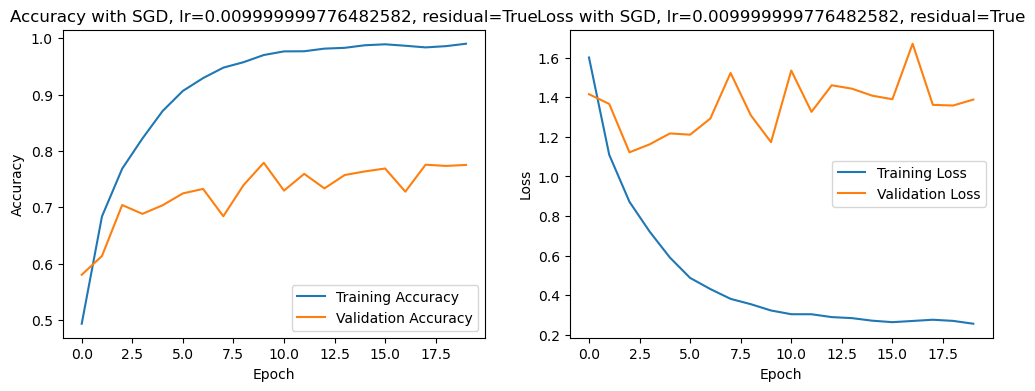

Training with optimizer=SGD, learning_rate=0.009999999776482582, use_residual=False
Epoch 1/20
625/625 [==============================] - 71s 112ms/step - loss: 1.6704 - accuracy: 0.4527 - val_loss: 1.4215 - val_accuracy: 0.5530
Epoch 2/20
625/625 [==============================] - 70s 112ms/step - loss: 1.1869 - accuracy: 0.6429 - val_loss: 1.2874 - val_accuracy: 0.6130
Epoch 3/20
625/625 [==============================] - 71s 114ms/step - loss: 0.9372 - accuracy: 0.7343 - val_loss: 1.1807 - val_accuracy: 0.6653
Epoch 4/20
625/625 [==============================] - 71s 114ms/step - loss: 0.7831 - accuracy: 0.7915 - val_loss: 1.0329 - val_accuracy: 0.7053
Epoch 5/20
625/625 [==============================] - 72s 115ms/step - loss: 0.6675 - accuracy: 0.8317 - val_loss: 1.1667 - val_accuracy: 0.7089
Epoch 6/20
625/625 [==============================] - 71s 114ms/step - loss: 0.5776 - accuracy: 0.8646 - val_loss: 0.9562 - val_accuracy: 0.7555
Epoch 7/20
625/625 [==========================

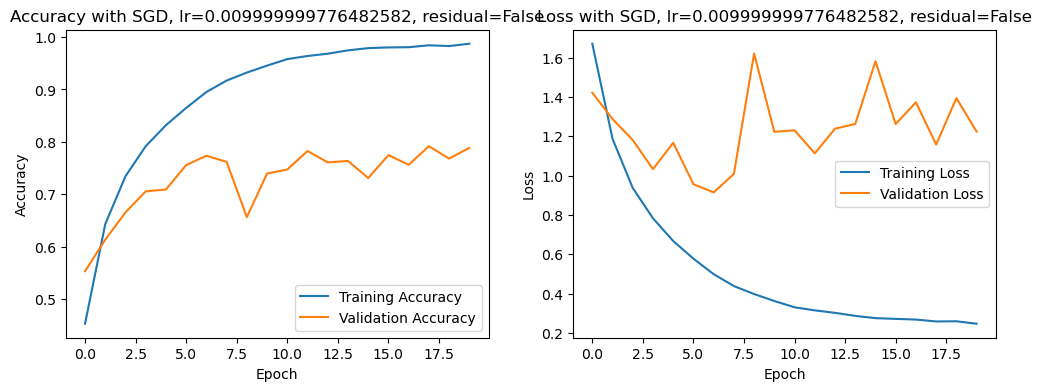

Training with optimizer=Adam, learning_rate=0.004999999888241291, use_residual=True
Epoch 1/20
625/625 [==============================] - 77s 121ms/step - loss: 1.9190 - accuracy: 0.4101 - val_loss: 2.3586 - val_accuracy: 0.2960
Epoch 2/20
625/625 [==============================] - 75s 120ms/step - loss: 1.4375 - accuracy: 0.5871 - val_loss: 1.4985 - val_accuracy: 0.5793
Epoch 3/20
625/625 [==============================] - 74s 119ms/step - loss: 1.3025 - accuracy: 0.6519 - val_loss: 1.5374 - val_accuracy: 0.5762
Epoch 4/20
625/625 [==============================] - 74s 119ms/step - loss: 1.2152 - accuracy: 0.6964 - val_loss: 1.5216 - val_accuracy: 0.5809
Epoch 5/20
625/625 [==============================] - 74s 119ms/step - loss: 1.1402 - accuracy: 0.7263 - val_loss: 1.4461 - val_accuracy: 0.6087
Epoch 6/20
625/625 [==============================] - 75s 119ms/step - loss: 1.0725 - accuracy: 0.7500 - val_loss: 1.7598 - val_accuracy: 0.5420
Epoch 7/20
625/625 [==========================

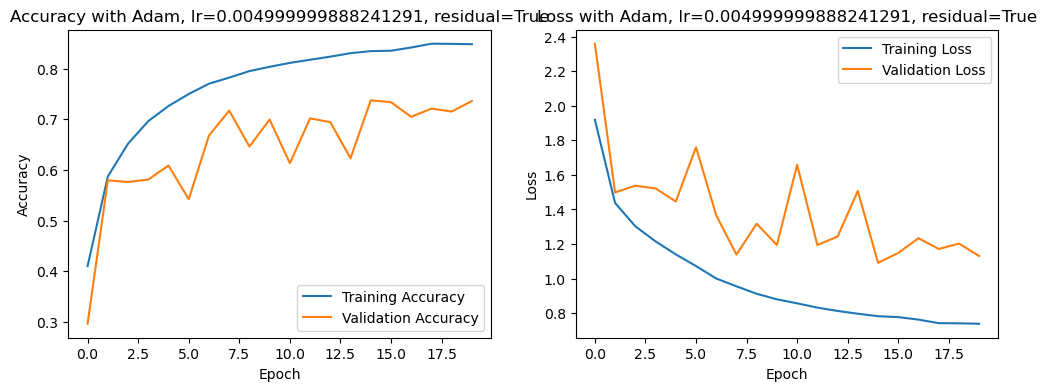

Training with optimizer=Adam, learning_rate=0.004999999888241291, use_residual=False
Epoch 1/20
625/625 [==============================] - 71s 112ms/step - loss: 2.8163 - accuracy: 0.2091 - val_loss: 4.7533 - val_accuracy: 0.2036
Epoch 2/20
625/625 [==============================] - 70s 111ms/step - loss: 1.8937 - accuracy: 0.3358 - val_loss: 1.8715 - val_accuracy: 0.3418
Epoch 3/20
625/625 [==============================] - 70s 112ms/step - loss: 1.7238 - accuracy: 0.3868 - val_loss: 1.8271 - val_accuracy: 0.3512
Epoch 4/20
625/625 [==============================] - 70s 112ms/step - loss: 1.5917 - accuracy: 0.4460 - val_loss: 1.5837 - val_accuracy: 0.4552
Epoch 5/20
625/625 [==============================] - 71s 113ms/step - loss: 1.4499 - accuracy: 0.5075 - val_loss: 1.4149 - val_accuracy: 0.5190
Epoch 6/20
625/625 [==============================] - 70s 111ms/step - loss: 1.3338 - accuracy: 0.5578 - val_loss: 1.9552 - val_accuracy: 0.3628
Epoch 7/20
625/625 [=========================

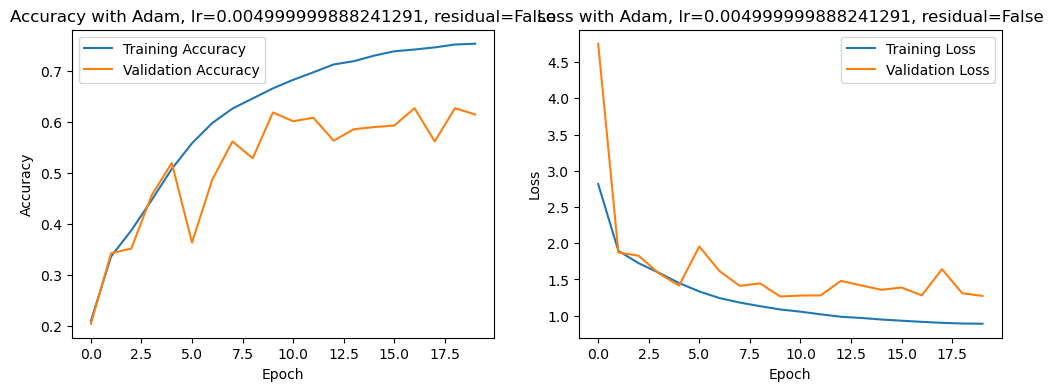

Training with optimizer=Adam, learning_rate=0.0010000000474974513, use_residual=True
Epoch 1/20
625/625 [==============================] - 78s 121ms/step - loss: 1.5344 - accuracy: 0.5224 - val_loss: 1.3590 - val_accuracy: 0.5924
Epoch 2/20
625/625 [==============================] - 75s 120ms/step - loss: 1.0668 - accuracy: 0.6988 - val_loss: 1.3907 - val_accuracy: 0.6269
Epoch 3/20
625/625 [==============================] - 75s 120ms/step - loss: 0.8918 - accuracy: 0.7699 - val_loss: 1.8154 - val_accuracy: 0.5679
Epoch 4/20
625/625 [==============================] - 75s 120ms/step - loss: 0.8016 - accuracy: 0.8119 - val_loss: 1.1237 - val_accuracy: 0.7155
Epoch 5/20
625/625 [==============================] - 75s 121ms/step - loss: 0.7353 - accuracy: 0.8414 - val_loss: 1.1096 - val_accuracy: 0.7376
Epoch 6/20
625/625 [==============================] - 75s 120ms/step - loss: 0.6876 - accuracy: 0.8660 - val_loss: 1.2063 - val_accuracy: 0.7250
Epoch 7/20
625/625 [=========================

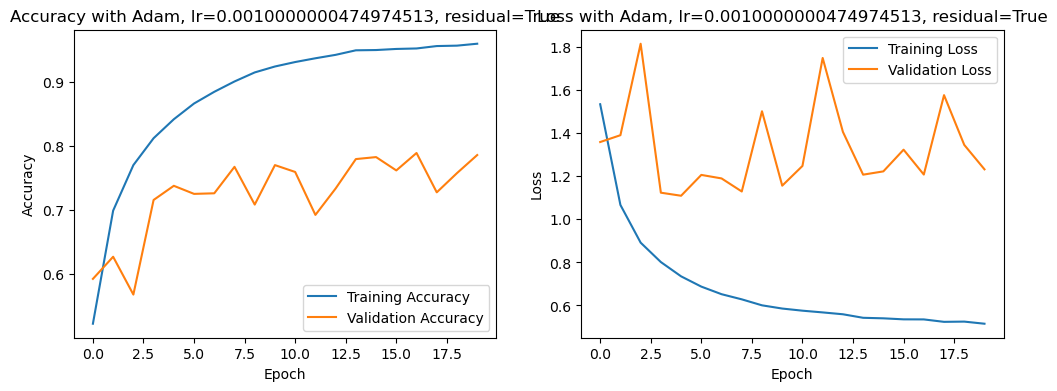

Training with optimizer=Adam, learning_rate=0.0010000000474974513, use_residual=False
Epoch 1/20
625/625 [==============================] - 73s 115ms/step - loss: 2.1027 - accuracy: 0.2878 - val_loss: 1.9643 - val_accuracy: 0.3416
Epoch 2/20
625/625 [==============================] - 70s 113ms/step - loss: 1.5916 - accuracy: 0.4684 - val_loss: 1.8035 - val_accuracy: 0.4147
Epoch 3/20
625/625 [==============================] - 71s 114ms/step - loss: 1.3279 - accuracy: 0.5784 - val_loss: 1.6788 - val_accuracy: 0.4900
Epoch 4/20
625/625 [==============================] - 71s 114ms/step - loss: 1.1596 - accuracy: 0.6471 - val_loss: 1.3488 - val_accuracy: 0.5860
Epoch 5/20
625/625 [==============================] - 71s 113ms/step - loss: 1.0530 - accuracy: 0.6902 - val_loss: 1.2912 - val_accuracy: 0.6254
Epoch 6/20
625/625 [==============================] - 71s 114ms/step - loss: 0.9719 - accuracy: 0.7251 - val_loss: 1.1819 - val_accuracy: 0.6615
Epoch 7/20
625/625 [========================

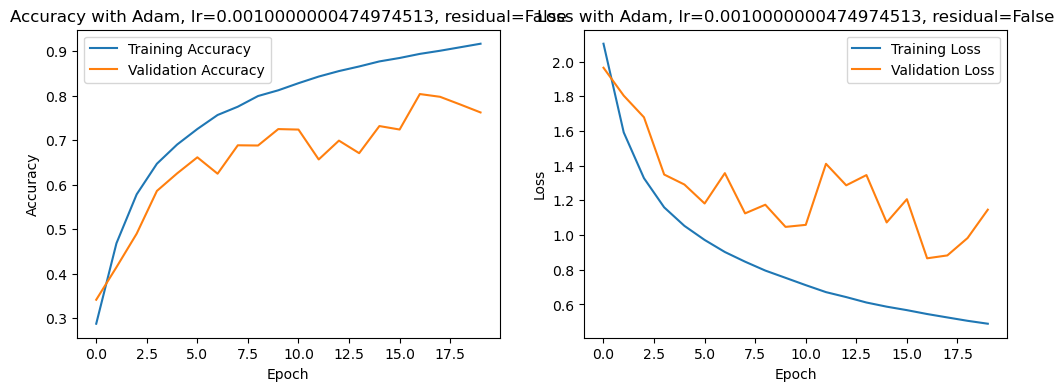

In [75]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.legacy import SGD as LegacySGD, Adam as LegacyAdam

# Setting the Hyperparameter Combination of Optimizer and Learning Rate
optimizers = [
    LegacySGD(learning_rate=0.05, momentum=0.9),
    LegacySGD(learning_rate=0.01, momentum=0.9),
    LegacyAdam(learning_rate=0.005),
    LegacyAdam(learning_rate=0.001),
]

# Setting residual join options
residual_options = [True, False]  # Whether to use residual chaining

for optimizer in optimizers:
    for use_residual in residual_options:
        model = build_resnet18(use_residual=use_residual)
        model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
        print(f"Training with optimizer={type(optimizer).__name__}, learning_rate={optimizer.learning_rate.numpy()}, use_residual={use_residual}")

        # Train the model and record results
        history = model.fit(
            x_train, y_train,
            batch_size=64,
            validation_data=(x_val, y_val),
            epochs=20,
            verbose=1
        )

        results.append({
            'optimizer': type(optimizer).__name__,
            'learning_rate': optimizer.learning_rate.numpy(),
            'use_residual': use_residual,
            'history': history.history
        })

        # Plot training curves for each set of hyperparameters
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracy with {type(optimizer).__name__}, lr={optimizer.learning_rate.numpy()}, residual={use_residual}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss with {type(optimizer).__name__}, lr={optimizer.learning_rate.numpy()}, residual={use_residual}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()

### Select the best hyperparameter combination to retrain and then evaluate on the test set

In [77]:
best_accuracy = 0
best_params = None

# Iterate through the results list to find the hyperparameter combination with the highest accuracy on the validation set
for result in results:
    # Extract parameters and historical data from results
    params = {
        'optimizer': result['optimizer'],
        'learning_rate': result['learning_rate'],
        'use_residual': result['use_residual']
    }
    history = result['history']
    
    # Find the highest accuracy of the current combination on the validation set
    val_accuracy = max(history['val_accuracy'])
    
    # Update the best hyperparameter combination and accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params 

# Output the best hyperparameter combination and the highest accuracy on the validation set
if best_params is not None:
    print(f'Optimal Hyperparameter Combination: {best_params}, Highest accuracy on validation set: {best_accuracy:.4f}')
else:
    print("No valid results found in `results`. Please check your `results` structure.")

Optimal Hyperparameter Combination: {'optimizer': 'Adam', 'learning_rate': 0.001, 'use_residual': False}, Highest accuracy on validation set: 0.8036


In [78]:
from tensorflow.keras.backend import clear_session
import numpy as np


if best_params is not None:
    best_optimizer_name = best_params['optimizer']
    best_learning_rate = best_params['learning_rate']
    best_use_residual = best_params['use_residual']
    
    # Create the appropriate optimizer instance using the best optimizer name
    if best_optimizer_name == 'SGD':
        best_optimizer = LegacySGD(learning_rate=best_learning_rate, momentum=0.9)
    elif best_optimizer_name == 'Adam':
        best_optimizer = LegacyAdam(learning_rate=best_learning_rate)
    else:
        raise ValueError(f"Unrecognized optimizer: {best_optimizer_name}")
    
    # Clean up the session and rebuild the ResNet-18 model
    clear_session()
    model = build_resnet18(use_residual=best_use_residual)
    model.compile(optimizer=best_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Co-train training set and validation set using model with optimal parameters
    print(f"Training final model with optimizer={best_optimizer_name}, learning_rate={best_learning_rate}, use_residual={best_use_residual}")
    model.fit(
        np.concatenate((x_train, x_val)), np.concatenate((y_train, y_val)),
        epochs=20,
        batch_size=64,
        verbose=1
    )

    # Evaluate the final model on the test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Final model test accuracy: {test_accuracy:.4f}')
else:
    print("No optimal hyperparameter combination found. Please check `results` structure.")

Training final model with optimizer=Adam, learning_rate=0.0010000000474974513, use_residual=False
Epoch 1/20
782/782 [==============================] - 79s 99ms/step - loss: 1.5951 - accuracy: 0.4832
Epoch 2/20
782/782 [==============================] - 81s 103ms/step - loss: 1.1280 - accuracy: 0.6661
Epoch 3/20
782/782 [==============================] - 81s 104ms/step - loss: 0.9570 - accuracy: 0.7336
Epoch 4/20
782/782 [==============================] - 81s 103ms/step - loss: 0.8610 - accuracy: 0.7732
Epoch 5/20
782/782 [==============================] - 81s 103ms/step - loss: 0.8028 - accuracy: 0.7966
Epoch 6/20
782/782 [==============================] - 81s 104ms/step - loss: 0.7596 - accuracy: 0.8185
Epoch 7/20
782/782 [==============================] - 81s 103ms/step - loss: 0.7247 - accuracy: 0.8334
Epoch 8/20
782/782 [==============================] - 81s 104ms/step - loss: 0.6886 - accuracy: 0.8489
Epoch 9/20
782/782 [==============================] - 82s 104ms/step - loss: 0.

### Do some visualization for the evaluation of the final model

In [80]:
from sklearn.metrics import classification_report
import numpy as np
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.reshape(-1)
print(classification_report(y_true, y_pred, target_names=class_names))

313/313 [==============================] - 6s 20ms/step
              precision    recall  f1-score   support

    airplane       0.86      0.75      0.80      1000
  automobile       0.94      0.84      0.89      1000
        bird       0.57      0.85      0.68      1000
         cat       0.61      0.72      0.66      1000
        deer       0.64      0.86      0.73      1000
         dog       0.95      0.41      0.58      1000
        frog       0.87      0.83      0.85      1000
       horse       0.95      0.62      0.75      1000
        ship       0.68      0.96      0.80      1000
       truck       0.95      0.73      0.82      1000

    accuracy                           0.76     10000
   macro avg       0.80      0.76      0.76     10000
weighted avg       0.80      0.76      0.76     10000



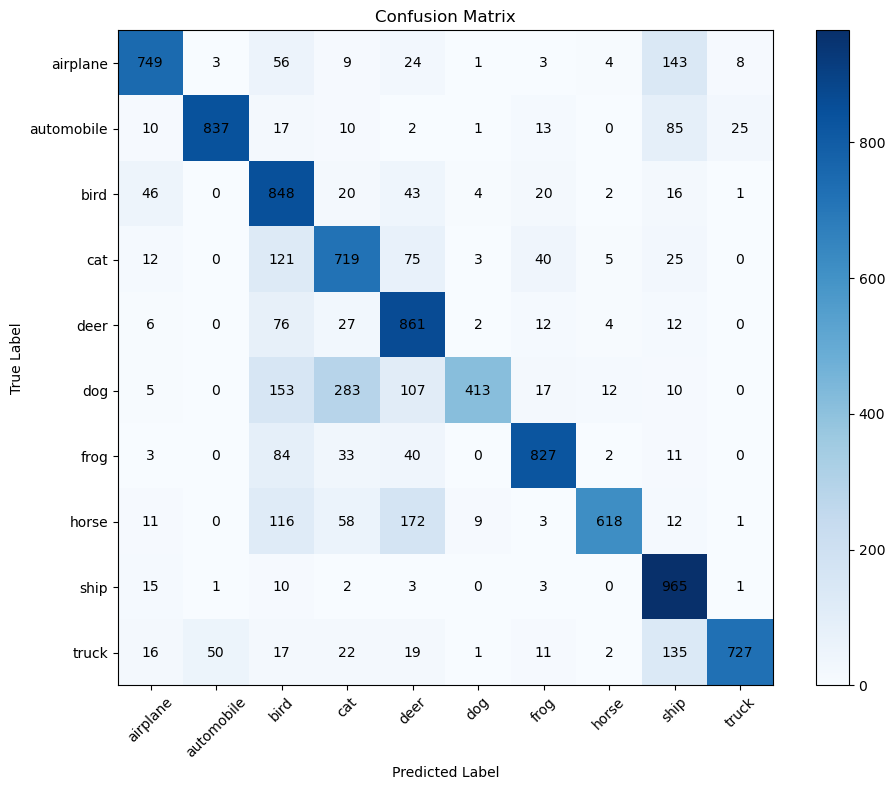

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true, y_pred)

class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap="Blues")
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

313/313 [==============================] - 6s 20ms/step
Overall AUC-ROC Score: 0.9756


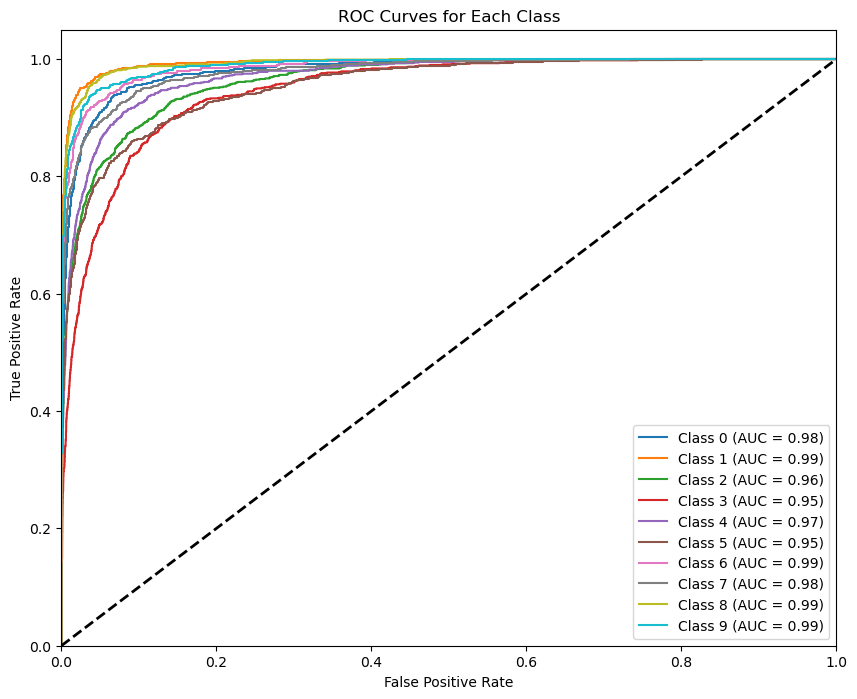

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.utils import to_categorical

num_classes = 10  

y_test_one_hot = to_categorical(y_test, num_classes=num_classes)
y_pred_probs = model.predict(x_test)

overall_auc = roc_auc_score(y_test_one_hot, y_pred_probs, multi_class="ovo")
print(f"Overall AUC-ROC Score: {overall_auc:.4f}")

plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_probs[:, i])
    class_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {class_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

### Common types of errors

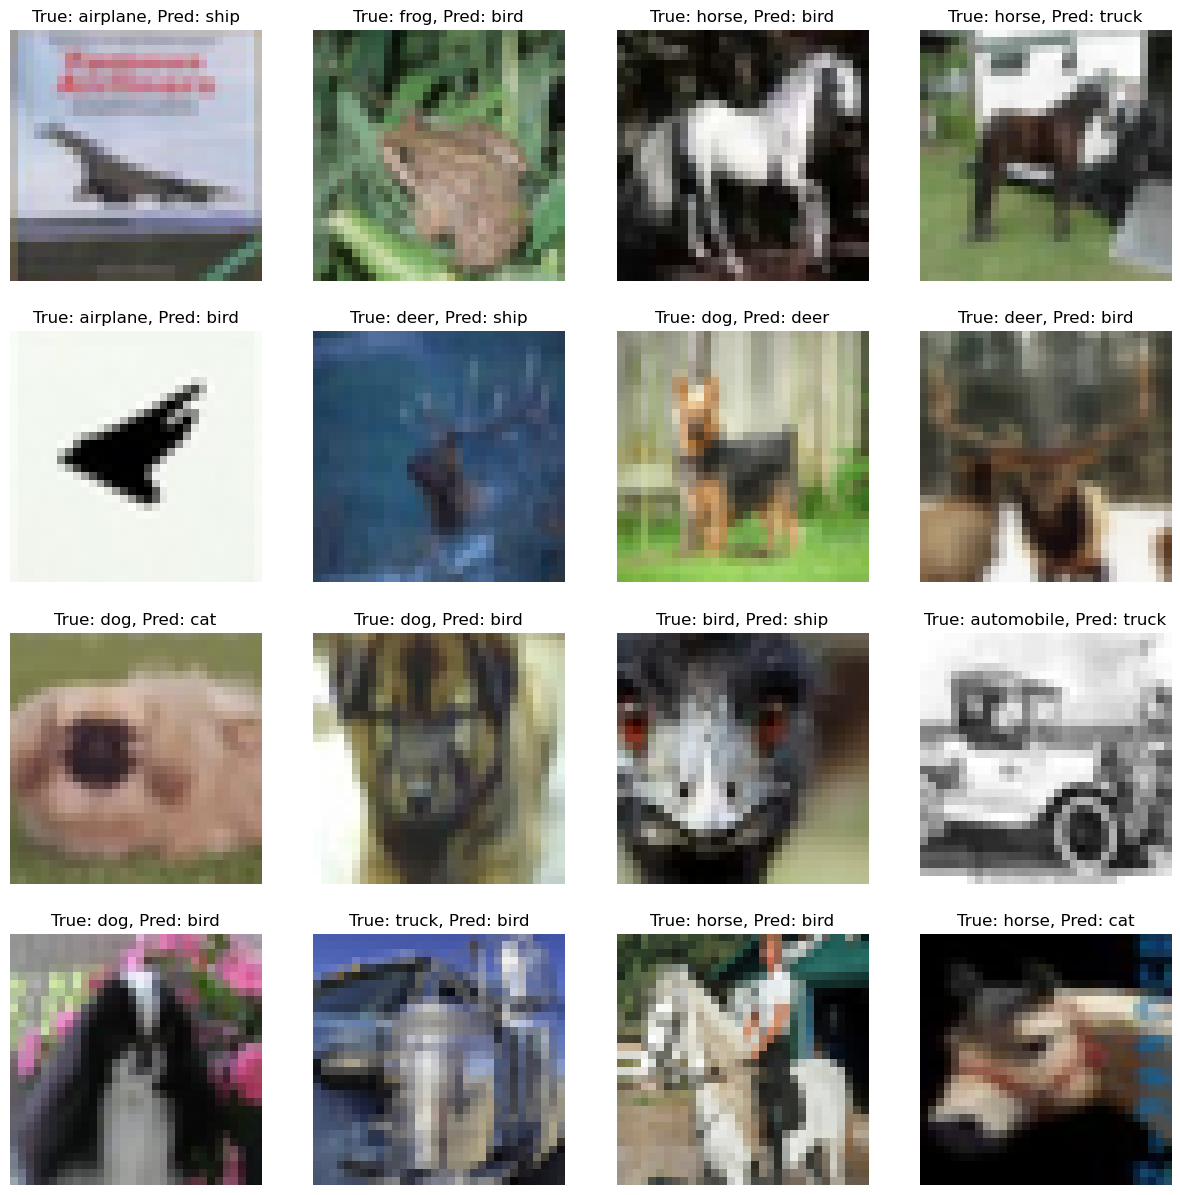

In [82]:
misclassified_idx = np.where(y_pred != y_true)[0]

plt.figure(figsize=(15, 15))
for i, idx in enumerate(misclassified_idx[:16]):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}, Pred: {class_names[y_pred[idx]]}")
    plt.axis("off")
plt.show()